In [126]:
import pandas as pd
import numpy as np

# meth = pd.read_csv("data_methylation_hm450.txt", sep='\t')

# genes_used_in_mean_meth_paper = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/all_genes_from_beta_data.txt')
# gene_list = genes_used_in_mean_meth_paper.iloc[:, 0].astype(str).tolist()

# meth['Hugo_Symbol'] = meth['Hugo_Symbol'].str.upper()
# gene_list_upper = [gene.upper() for gene in gene_list]

# print(f"before: {len(meth)}")
# meth = meth[meth['Hugo_Symbol'].isin(gene_list_upper)].reset_index(drop=True)
# print(f"after: {len(meth)}")

# print(f"list length {len(gene_list)}")

In [127]:
df = pd.read_csv('aggreagated_ccle_meth.csv')
df.set_index('Gene', inplace=True)

df

,22RV1_PROSTATE,2313287_STOMACH,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,786O_KIDNEY,...,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.700977,0.292737,0.948531,0.729255,0.563342,0.690065,0.555697,0.721128,0.647612,0.615722,...,0.713275,0.833284,0.779894,0.611966,0.588276,0.794775,0.655867,0.499400,0.689347,0.680597
A1BG-AS1,0.864430,0.325102,1.000000,0.964366,0.661393,0.928355,0.694338,0.924852,0.728296,0.659990,...,0.949071,0.870708,0.749844,0.725060,0.634088,0.947149,0.814730,0.703187,0.931171,0.877421
A2M-AS1,0.487984,0.225840,0.864180,0.650941,0.363861,0.332170,0.297620,0.927886,0.501806,0.524130,...,0.928240,0.291064,0.444363,0.459364,0.339701,0.401069,0.447277,0.543056,0.282060,0.557086
A2ML1,0.811535,0.214016,0.749033,0.362362,0.728373,0.653240,0.624993,0.950790,0.565398,0.491657,...,0.275778,0.788294,0.631718,0.861452,0.719114,0.862180,0.595340,0.272608,0.718046,0.699710
A3GALT2,0.945782,0.547574,0.919390,0.895300,0.744416,0.916710,0.811513,0.737548,0.770234,0.702200,...,0.558084,0.965063,0.873890,0.834528,0.774532,0.883137,0.808708,0.709664,0.831622,0.805736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.308764,0.447938,0.019467,0.866186,0.537378,0.497297,0.094634,0.710938,0.018079,0.825872,...,0.266128,0.019544,0.818402,0.262884,0.726856,0.570759,0.593241,0.430826,0.041164,0.015894
ZYG11B,0.033550,0.000000,0.000000,0.006240,0.000000,0.130855,0.000000,0.000000,0.000000,0.000820,...,0.000000,0.009135,0.000000,0.000000,0.003435,0.000000,0.000000,0.002605,0.000000,0.002935
ZYX,0.547548,0.343440,0.313680,0.180675,0.281527,0.152202,0.311670,0.537375,0.167360,0.263250,...,0.343487,0.424050,0.270750,0.332412,0.320827,0.280137,0.171788,0.239782,0.461952,0.456492


In [128]:
import pandas as pd
import numpy as np

wd = "C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data"

df = pd.read_csv('aggreagated_ccle_meth.csv')
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x : pd.to_numeric(x, errors="coerce")).fillna(np.nan)
df = df.groupby("Gene").mean().T
df.index = [x.split("_")[0] for x in df.index]
df = df.loc[~df.index.duplicated(keep="first")]
df = df.T
df.head()

meth = df

In [129]:
genes_used_in_mean_meth_paper = pd.read_csv('all_genes_from_beta_data.txt')
gene_list = genes_used_in_mean_meth_paper.iloc[:, 0].astype(str).tolist()

meth.index = meth.index.str.upper()
gene_list_upper = [gene.upper() for gene in gene_list]

print(f"before: {len(meth)}")
meth = meth[meth.index.isin(gene_list_upper)].reset_index(drop=True)
print(f"after: {len(meth)}")

print(f"list length {len(gene_list)}")

before: 22502
after: 15008
list length 20248


In [130]:

means = meth.mean(skipna=True)
means

22RV1      0.298771
2313287    0.261143
253J       0.408695
42MGBA     0.366347
5637       0.313422
             ...   
YD8        0.401307
YH13       0.250337
YKG1       0.273469
ZR751      0.345631
ZR7530     0.371435
Length: 842, dtype: float64

In [131]:
info = pd.read_csv(f'{wd}/Cleveland/cleveland_sampleInfo.csv')
info.head()

,CellLine,Primarysite,Histology,Subhistology
0,SKNFI,autonomic_ganglia,neuroblastoma,NS
1,IMR32,autonomic_ganglia,neuroblastoma,NS
2,SKNAS,autonomic_ganglia,neuroblastoma,NS
3,CHP212,autonomic_ganglia,neuroblastoma,NS
4,KPNSI9S,autonomic_ganglia,neuroblastoma,NS


In [132]:
df = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/cleveland_auc_only.csv')
df.head()

,id,auc
0,SKNFI,2.861642
1,IMR32,0.549051
2,SKNAS,3.258931
3,CHP212,1.344093
4,KPNSI9S,2.325173


In [133]:
np.median(means.values)

0.33502014080532105

In [134]:
df['mean_methylation'] = [means[pdx] if pdx in means else np.nan for pdx in df['id']]
df = df[df['mean_methylation'].notna()]
df

,id,auc,mean_methylation
0,SKNFI,2.861642,0.315439
1,IMR32,0.549051,0.325696
2,SKNAS,3.258931,0.286236
3,CHP212,1.344093,0.332608
4,KPNSI9S,2.325173,0.321513
...,...,...,...
504,SF268,2.327168,0.316103
505,HOP62,1.539943,0.344037
506,WM983B,2.886021,0.331078
507,PECAPJ34CLONEC12,2.190759,0.338043


## Plot division:

c:\Users\mmarc\miniconda3\envs\pnet-repro\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


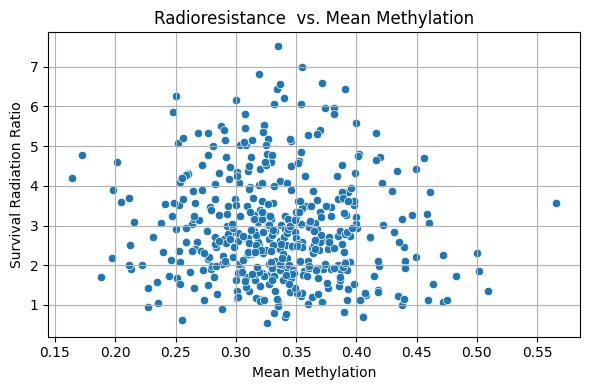

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='mean_methylation', y='auc')
plt.title("Radioresistance  vs. Mean Methylation")
plt.xlabel("Mean Methylation")
plt.ylabel("Survival Radiation Ratio")
# plt.legend(title="Class\n(1=Resistant)")
plt.grid(True)
plt.tight_layout()
plt.show()


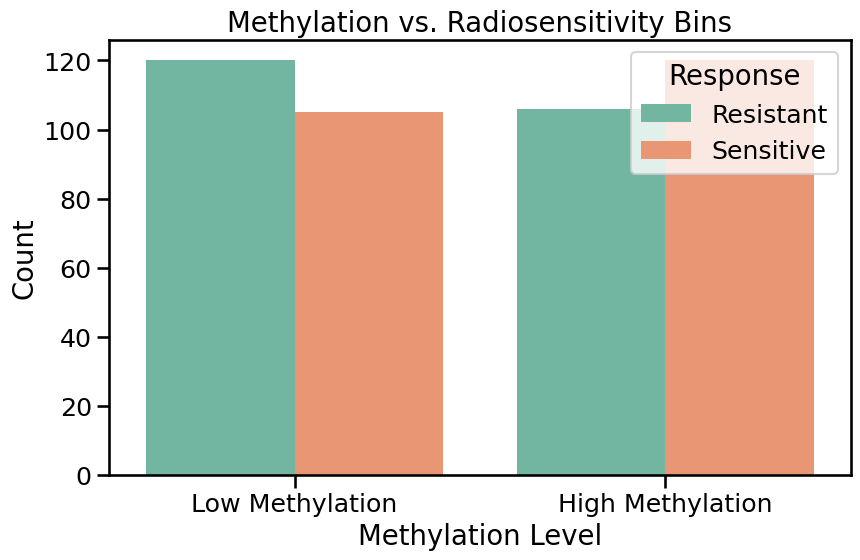

In [107]:
plot_df = df
# Create categorical bins
meth_median = plot_df['mean_methylation'].median()
auc_median = plot_df['auc'].median()

plot_df['methylation_bin'] = (plot_df['mean_methylation'] >= meth_median).map({True: 'High Methylation', False: 'Low Methylation'})
plot_df['auc_bin'] = (plot_df['auc'] >= auc_median).map({True: 'Resistant', False: 'Sensitive'})

plt.figure(figsize=(9, 6))
sns.countplot(data=plot_df, x='methylation_bin', hue='auc_bin', palette='Set2')
plt.title("Methylation vs. Radiosensitivity Bins")
plt.xlabel("Methylation Level")
plt.ylabel("Count")
plt.legend(title="Response")
plt.tight_layout()
plt.show()


In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def show_pseudo_km_curve(specific, threshold=None):
    therapy = "auc"

    # Pull arrays
    auc = np.array(specific[therapy].values.ravel(), dtype=float)
    methylation = np.array(specific['mean_methylation'].values.ravel(), dtype=float)

    # Remove NaNs pairwise (keep rows with both values present)
    valid = ~np.isnan(auc) & ~np.isnan(methylation)
    auc = auc[valid]
    methylation = methylation[valid]

    print(methylation)

    # Threshold (NaN-robust)
    if threshold is None:
        threshold = np.nanmedian(methylation)
        # print(f"threshold {threshold}")

    # Groups
    group_high = methylation >= threshold
    group_low  = methylation < threshold

    auc_high = auc[group_high]
    auc_low  = auc[group_low]

    def pseudo_km_curve(auc_values):
        if len(auc_values) == 0:
            return np.array([]), np.array([])
        auc_sorted = np.sort(auc_values)
        surv_prob = 1 - np.arange(1, len(auc_sorted) + 1) / len(auc_sorted)
        return auc_sorted, surv_prob

    auc_h, surv_h = pseudo_km_curve(auc_high)
    auc_l, surv_l = pseudo_km_curve(auc_low)

    plt.figure(figsize=(9, 6))

    if auc_h.size > 0:
        plt.step(auc_h, surv_h, where="post", color="red", label=f"high (≥{threshold:.2f})")
    if auc_l.size > 0:
        plt.step(auc_l, surv_l, where="post", color="blue", label=f"low (<{threshold:.2f})")

    # Annotate medians (only if group non-empty)
    if auc_high.size > 0:
        median_h = float(np.median(auc_high))
        plt.axvline(median_h, color="red", linestyle="--")
        plt.text(median_h, 0.25, f"median AUC: {median_h:.2f}", color="red", ha="right")
    if auc_low.size > 0:
        median_l = float(np.median(auc_low))
        plt.axvline(median_l, color="blue", linestyle="--")
        plt.text(median_l, 0.5, f"median AUC: {median_l:.2f}", color="blue", ha="left")

    plt.xlabel("AUC (lower = more radiosensitive)")
    plt.ylabel("Fraction of more sensitive models")
    plt.title(f"Radiosensitivity stratified by methylation level on {len(specific)} samples")
    plt.legend(title="Mean methylation")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example
# show_pseudo_km_curve(df)


In [95]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

def find_best_threshold(merged):
    # --- Inputs: replace with your columns / frame
    # expects a DataFrame `merged` with columns: 'mean_methylation' and 'auc'
    x = merged['mean_methylation'].to_numpy()
    y = merged['auc'].to_numpy()

    # --- Clean
    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]

    N = len(x)
    if N < 10:
        raise ValueError("Not enough samples after cleaning.")

    # --- Candidate thresholds (avoid extremes to keep both groups sizable)
    # Use quantiles to limit to central range and to down-sample candidates
    q_lo, q_hi = 0.05, 0.95
    lo, hi = np.quantile(x, [q_lo, q_hi])
    candidates = np.quantile(x, np.linspace(q_lo, q_hi, 200))

    # --- Scan thresholds and compute a rank-based separation
    min_prop = 0.25      # require at least 10% of samples in each group
    records = []
    for t in candidates:
        hi_mask = x >= t
        lo_mask = ~hi_mask
        n1, n2 = hi_mask.sum(), lo_mask.sum()
        if (n1 < max(3, int(min_prop*N))) or (n2 < max(3, int(min_prop*N))):
            continue

        # Mann–Whitney U on AUC distributions (rank-based)
        # (asymptotic gives us a two-sided p-value; we store it for the best threshold)
        res = mannwhitneyu(y[hi_mask], y[lo_mask], alternative='two-sided')
        U = res.statistic

        # Convert to a symmetric effect size: Cliff's delta in [-1, 1]
        # relation: U = (delta + 1)/2 * (n1*n2)  -> delta = 2U/(n1*n2) - 1
        delta = 2*U/(n1*n2) - 1

        records.append((t, n1, n2, U, delta, res.pvalue))

    scan = pd.DataFrame(records, columns=['threshold','n_high','n_low','U','delta','p'])

    # --- Pick the cutoff that maximizes |delta| (strongest rank-based separation)
    idx = np.abs(scan['delta']).values.argmax()
    best = scan.iloc[idx]

    best_t = float(best['threshold'])
    best_delta = float(best['delta'])
    best_p = float(best['p'])
    n1, n2 = int(best['n_high']), int(best['n_low'])

    # --- Summaries at the best cutoff
    hi_mask = x >= best_t
    lo_mask = ~hi_mask
    med_hi = float(np.median(y[hi_mask]))
    med_lo = float(np.median(y[lo_mask]))

    print(f"Best cutoff (ranked-statistic): {best_t:.3f}")
    print(f"Group sizes: high={n1}, low={n2}")
    print(f"Cliff's delta: {best_delta:+.3f} (abs={abs(best_delta):.3f})")
    print(f"Mann–Whitney two-sided p-value (asymptotic): {best_p:.3g}")
    print(f"Median AUC: high={med_hi:.3f}, low={med_lo:.3f}, diff={med_hi - med_lo:+.3f}")

    # --- Plot the ranked statistic vs threshold (Fig. 2D analogue)
    plt.figure(figsize=(7,5))
    plt.plot(scan['threshold'], scan['delta'], linewidth=2)
    plt.axvline(best_t, linestyle='--')
    plt.xlabel("Mean methylation cutoff")
    plt.ylabel("Rank-based effect size (Cliff's delta)")
    plt.title("Scan of ranked statistic across methylation cutoffs")
    # annotate
    y_annot = best_delta
    plt.text(best_t, y_annot, f"  best = {best_t:.3f}\n  delta = {best_delta:+.3f}\n  n={n1}+{n2}\n  p={best_p:.2g}",
            va='bottom')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return best_t

In [73]:
merged

,Primarysite,Histology,Subhistology,auc,mean_methylation,methylation_bin,auc_bin
CellLine,,,,,,,
SKNFI,autonomic_ganglia,neuroblastoma,NS,2.861642,0.315439,Low Methylation,Resistant
IMR32,autonomic_ganglia,neuroblastoma,NS,0.549051,0.325696,Low Methylation,Sensitive
SKNAS,autonomic_ganglia,neuroblastoma,NS,3.258931,0.286236,Low Methylation,Resistant
CHP212,autonomic_ganglia,neuroblastoma,NS,1.344093,0.332608,High Methylation,Sensitive
KPNSI9S,autonomic_ganglia,neuroblastoma,NS,2.325173,0.321513,Low Methylation,Sensitive
...,...,...,...,...,...,...,...
WM983B,NaN,NaN,NaN,2.886021,0.331078,Low Methylation,Resistant
PECAPJ34CLONEC12,NaN,NaN,NaN,2.190759,0.338043,High Methylation,Sensitive
PECAPJ41CLONED2,NaN,NaN,NaN,1.427756,0.265450,Low Methylation,Sensitive


# All of the plots

Best cutoff (ranked-statistic): 0.280
Group sizes: high=21, low=9
Cliff's delta: +0.206 (abs=0.206)
Mann–Whitney two-sided p-value (asymptotic): 0.39
Median AUC: high=2.844, low=2.579, diff=+0.266


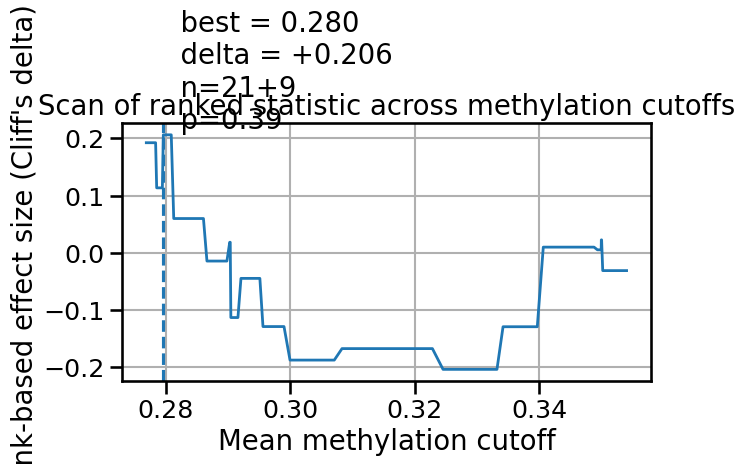

[0.45577791 0.34933777 0.30820423 0.29038203 0.27844973 0.4116663
 0.36634652 0.27346909 0.29916487 0.35005935 0.25033677 0.2796114
 0.42199147 0.34999098 0.29027469 0.35423665 0.27682078 0.33346777
 0.32402847 0.28099871 0.36359563 0.29162158 0.17255661 0.3808264
 0.26042474 0.28619907 0.29548471 0.34046074 0.23476293 0.26807439]


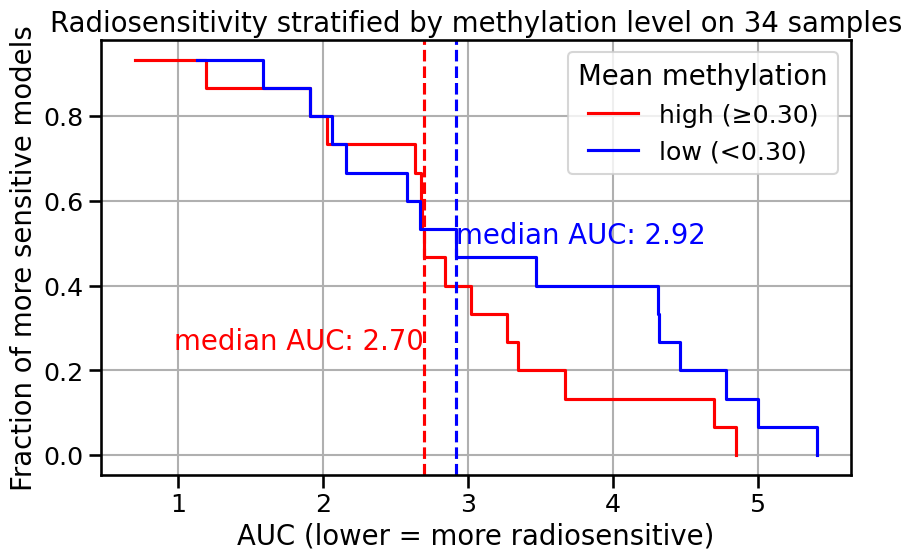

[0.45577791 0.34933777 0.30820423 0.29038203 0.27844973 0.4116663
 0.36634652 0.27346909 0.29916487 0.35005935 0.25033677 0.2796114
 0.42199147 0.34999098 0.29027469 0.35423665 0.27682078 0.33346777
 0.32402847 0.28099871 0.36359563 0.29162158 0.17255661 0.3808264
 0.26042474 0.28619907 0.29548471 0.34046074 0.23476293 0.26807439]


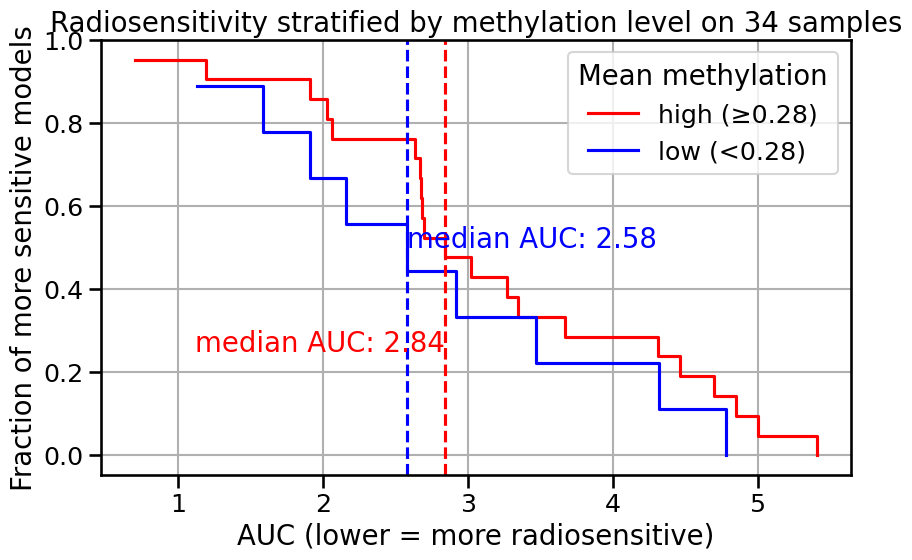

In [136]:
column_name = 'Primarysite'
column_val = 'central_nervous_system'
specific = merged[merged[column_name] == column_val]
# specific = merged

best_t = find_best_threshold(specific)
show_pseudo_km_curve(specific)
show_pseudo_km_curve(specific, best_t)


## Version with best threshold

In [140]:
column_name = 'Primarysite'
column_val = 'central_nervous_system'
specific = merged[merged[column_name] == column_val]

glio = specific[specific["Subhistology"].str.contains("astrocytoma_Grade_IV", na=False)]

In [149]:
glio["auc"] > 4

CellLine
42MGBA       False
YKG1         False
M059K        False
GMS10        False
YH13         False
8MGBA        False
T98G         False
A172         False
DKMG         False
DBTRG05MG    False
AM38          True
SF295        False
KNS60        False
SNU466       False
LN229        False
LN18         False
SNU1105       True
GB1          False
Name: auc, dtype: bool

In [137]:
df

,id,auc,mean_methylation
0,SKNFI,2.861642,0.315439
1,IMR32,0.549051,0.325696
2,SKNAS,3.258931,0.286236
3,CHP212,1.344093,0.332608
4,KPNSI9S,2.325173,0.321513
...,...,...,...
504,SF268,2.327168,0.316103
505,HOP62,1.539943,0.344037
506,WM983B,2.886021,0.331078
507,PECAPJ34CLONEC12,2.190759,0.338043


In [87]:
merged = (
    info.set_index("CellLine")
    .join(df.set_index("id")) 
)
merged

,Primarysite,Histology,Subhistology,auc,mean_methylation
CellLine,,,,,
SKNFI,autonomic_ganglia,neuroblastoma,NS,2.861642,0.315439
IMR32,autonomic_ganglia,neuroblastoma,NS,0.549051,0.325696
SKNAS,autonomic_ganglia,neuroblastoma,NS,3.258931,0.286236
CHP212,autonomic_ganglia,neuroblastoma,NS,1.344093,0.332608
KPNSI9S,autonomic_ganglia,neuroblastoma,NS,2.325173,0.321513
...,...,...,...,...,...
WM983B,NaN,NaN,NaN,2.886021,0.331078
PECAPJ34CLONEC12,NaN,NaN,NaN,2.190759,0.338043
PECAPJ41CLONED2,NaN,NaN,NaN,1.427756,0.265450


In [15]:
merged['Primarysite'].value_counts()

Primarysite
lung                         96
large_intestine              40
ovary                        38
central_nervous_system       34
skin                         32
pancreas                     31
breast                       26
oesophagus                   23
upper_aerodigestive_tract    22
endometrium                  21
liver                        20
stomach                      19
urinary_tract                19
kidney                       16
soft_tissue                  15
bone                         12
thyroid                       8
pleura                        7
autonomic_ganglia             7
biliary_tract                 5
prostate                      4
salivary_gland                2
Name: count, dtype: int64

### Validate using a more interpretable way:

Methylation threshold used: 0.3486864172704872


C:\Users\mmarc\AppData\Local\Temp\ipykernel_24244\2163609563.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sensitivity', y=therapy_col, data=df, order=order,


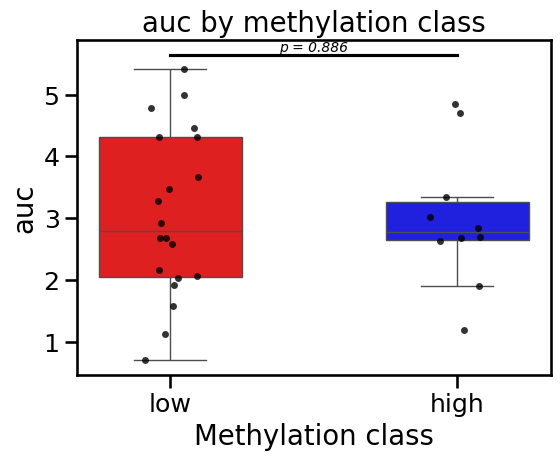

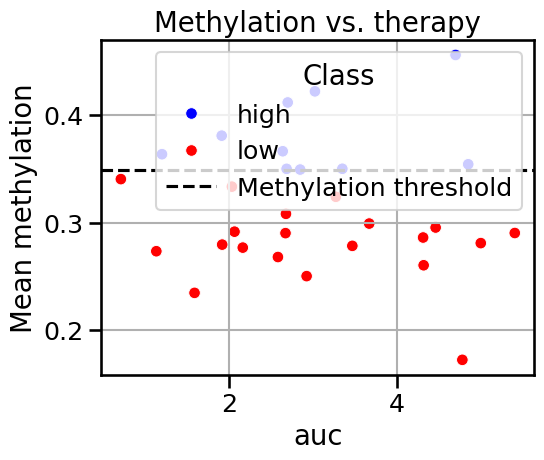

(0.1453706337772365, 0.8857805323157942)

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def plot_sensitivity_vs_methylation(df, therapy_col='auc', methyl_col='mean_methylation', threshold=None):
    df = df.copy()

    # Ensure columns are numeric and drop rows with NaNs or non-numeric values
    df[therapy_col] = pd.to_numeric(df[therapy_col], errors='coerce')
    df[methyl_col]  = pd.to_numeric(df[methyl_col],  errors='coerce')
    df.dropna(subset=[therapy_col, methyl_col], inplace=True)

    # Determine methylation threshold
    if threshold is None:
        threshold = df[methyl_col].median()
    print(f"Methylation threshold used: {threshold}")

    # Define methylation class (low/high)
    df['sensitivity'] = np.where(df[methyl_col] <= threshold, 'low', 'high')
    order = ['low', 'high']

    # T-test: compare THERAPY values between methylation classes (FIXED)
    group1 = df.loc[df['sensitivity'] == 'low',  therapy_col]
    group2 = df.loc[df['sensitivity'] == 'high', therapy_col]
    stat, pval = ttest_ind(group1, group2, nan_policy='omit', equal_var=False)

    # Pretty label for therapy axis
    pretty_therapy = therapy_col.replace('_', ' ')

    # ---- Box + strip ----
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='sensitivity', y=therapy_col, data=df, order=order,
                palette={'low': 'red', 'high': 'blue'}, width=0.5, fliersize=0)
    sns.stripplot(x='sensitivity', y=therapy_col, data=df, order=order,
                  color='black', jitter=True, size=5, alpha=0.8)

    # p-value line
    y_max  = df[therapy_col].max()
    y_min  = df[therapy_col].min()
    y_line = y_max + (y_max - y_min) * 0.05
    plt.plot([0, 1], [y_line, y_line], color='black')
    plt.text(0.5, y_line + 0.01, f"p = {pval:.3f}", ha='center', va='bottom', fontsize=10, style='italic')

    # Labels/titles
    plt.xlabel("Methylation class")
    plt.ylabel(pretty_therapy)
    plt.title(f"{pretty_therapy} by methylation class")
    plt.tight_layout()
    plt.show()

    # ---- Scatter (therapy vs methylation + methyl threshold) ----
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x=therapy_col, y=methyl_col, hue='sensitivity',
                    palette={'low': 'red', 'high': 'blue'}, s=70)
    plt.axhline(threshold, color='black', linestyle='--', label='Methylation threshold')
    plt.xlabel(pretty_therapy)
    plt.ylabel("Mean methylation")
    plt.title("Methylation vs. therapy")
    plt.legend(title='Class')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return stat, pval


# Example use:
column_name = 'Primarysite'
column_val = 'central_nervous_system'
specific = merged[merged[column_name] == column_val]
# specific = df

plot_sensitivity_vs_methylation(specific, threshold=best_t)
